In [17]:
import sys
sys.path.append('../')

In [18]:
import game.agent as ag
from game.run import run
from game.simulator import load_simulator_yarn, GraphSimulator
from pathlib import Path
from tqdm.auto import trange
import pandas as pd
# import mpire
import torch

In [19]:
n_runs = int(1e4)
# n_runs = int(100)
seed = None

In [20]:
simulator = load_simulator_yarn('../yarnScripts', graph_file_sfx='_graph_transformed.pickle')

In [21]:
# label_predictor=ag.TorchLabelPredictor(
#             model_path=Path('./saved_bert/200_[20]_[30]_1_False_bert-base-multilingual-cased_0.001_adamw_8_max_val_mcc_False_False_100'),
#             use_cpu=False,
#         )

def get_random_agent():
    return ag.RandomAgent(None)

# def get_r_agent():
#     return ag.LabelDecisorAgent(
#         label_predictor=ag.GraphLabelLoader(
#             simulator=simulator,
#         ),
#         decision_maker=ag.RDecisionMaker(
#             rand=0.4,
#             seed=None,
#         )
#     )

def get_risky_agent():
    return ag.LabelDecisorAgent(
        label_predictor=ag.GraphLabelLoader(
            simulator=simulator,
        ),
        decision_maker=ag.BehavioralDecisionMaker(
            weight_funcs=[
                lambda x: x
            ],
            memory_steps=0,
            seed=None,
        )
    )


def get_risky_agent():
    return ag.LabelDecisorAgent(
        label_predictor=ag.GraphLabelLoader(
            simulator=simulator,
        ),
        decision_maker=ag.BehavioralDecisionMaker(
            weight_funcs=[
                lambda x: x
            ],
            memory_steps=0,
            seed=None,
        )
    )


def get_risky_ntm_agent():
    return ag.LabelDecisorAgent(
        label_predictor=ag.GraphLabelLoader(
            simulator=simulator,
        ),
        decision_maker=ag.BehavioralDecisionMaker(
            weight_funcs=[
                lambda x: 0.5*x,
                lambda x: -0.3*x,
                lambda x: -0.3*x,
            ],
            memory_steps=3,
            seed=None,
        )
    )



# def get_mc_agent():
#     return ag.LabelDecisorAgent(
#         label_predictor=ag.GraphLabelLoader(
#             simulator=simulator,
#         ),
#         decisor=ag.MarkovChainAgent(
#             rand=0.4,
#             seed=None,
#         )
#     )

## Random Agent

In [22]:
df = run(get_random_agent, simulator, n_runs)

100%|██████████| 10000/10000 [00:01<00:00, 5461.12it/s]


In [23]:
# df.to_csv('endings.csv')

In [24]:
df['endings']

,run,title,kind
0,0,MaloAmigos,0
1,1,MaloAmigos,0
2,2,MaloAmigos,0
3,3,MaloPadres,0
4,4,MaloSilencio,0
...,...,...,...
9995,9995,MaloSilencio,0
9996,9996,MaloPadres,0
9997,9997,MaloSilencio,0
9998,9998,BuenoPadres,1


In [25]:
t = df['decisions'].loc[df['decisions']['qid'] != -1,:]
t

,run,num,qid,choice,label
0,0,0,1.0,0,NaN
1,0,1,2.0,0,0.0
3,0,3,3.0,1,NaN
5,0,5,4.0,0,1.0
6,0,6,5.0,0,0.0
...,...,...,...,...,...
198924,9999,12,10.0,0,1.0
198925,9999,13,11.0,0,1.0
198927,9999,15,12.0,0,0.0
198929,9999,17,14.0,0,1.0


In [26]:
# t.pivot(index='run', columns='qid', values='label')['label']

In [27]:
df['decisions'].groupby(['qid']).mean()
# diferencia entre estos valores y los otros nos dice si tiene predilección por label o no

,run,num,choice,label
qid,,,,
-1.0,5000.257297,11.977930,0.000000,NaN
1.0,4999.500000,0.000000,0.498300,NaN
2.0,4999.500000,1.000000,0.494400,0.494400
3.0,4999.500000,3.000000,0.506300,NaN
4.0,4999.500000,5.000000,0.492300,0.507700
5.0,4999.500000,6.000000,0.509300,0.509300
6.0,5020.731985,7.000000,0.498135,0.498135
7.0,4999.500000,7.509300,0.505300,0.505300
8.0,5002.482090,8.506630,0.506828,0.506828


In [28]:
rand = df['decisions'].groupby(['num']).mean()
rand['m'] = 0

## Risky Agent

In [30]:
df = run(get_risky_agent, simulator, n_runs)

  0%|          | 0/10000 [00:00<?, ?it/s]c:\Users\vibal\PycharmProjects\text-games\notebooks\..\game\agent.py:235: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  self._p = F.softmax((pred * w[None, :]).sum(1)) # (actions, labels) -> (actions)
100%|██████████| 10000/10000 [00:33<00:00, 295.96it/s]


In [31]:
df['endings']

,run,title,kind
0,0,MaloSilencio,0
1,1,MaloAmanda,0
2,2,MaloSilencio,0
3,3,MaloSilencio,0
4,4,MaloSilencio,0
...,...,...,...
9995,9995,MaloPadres,0
9996,9996,MaloSilencio,0
9997,9997,MaloSilencio,0
9998,9998,MaloPadres,0


In [32]:
df['decisions'].groupby(['num']).mean()
# diferencia entre estos valores y los otros nos dice si tiene predilección por label o no

,run,qid,choice,label
num,,,,
0,4999.500000,1.000000,0.500400,NaN
1,4999.500000,2.000000,0.493000,0.493000
2,4999.500000,-1.000000,0.000000,NaN
3,4999.500000,3.000000,0.509900,NaN
4,4999.500000,-1.000000,0.000000,NaN
5,4999.500000,4.000000,0.497800,0.502200
6,4999.500000,5.000000,0.498900,0.498900
7,4999.500000,6.501100,0.500300,0.500300
8,4999.500000,5.215100,0.370800,0.497051


<AxesSubplot:xlabel='num'>

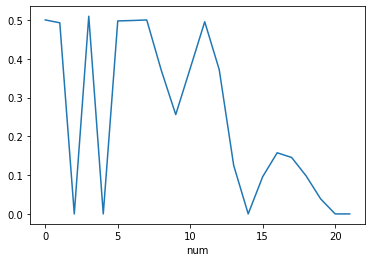

In [33]:
df['decisions'].groupby(['num']).mean()['choice'].plot()

In [34]:
risk = df['decisions'].groupby(['num']).mean()
risk['m'] = 1

## Risky But Not So Much Agent

In [35]:
df = run(get_risky_ntm_agent, simulator, n_runs)

  0%|          | 0/10000 [00:00<?, ?it/s]


ValueError: only one element tensors can be converted to Python scalars

In [ ]:
df['endings']

In [ ]:
df['decisions'].groupby(['num']).mean()
# diferencia entre estos valores y los otros nos dice si tiene predilección por label o no

In [ ]:
df['decisions'].groupby(['num']).mean()['choice'].plot()

In [ ]:
risk_ntm = df['decisions'].groupby(['num']).mean()
risk_ntm['m'] = 1

# Other

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.concat([rand,risk])
df = df.reset_index()
df = df.dropna()

df_train,df_test = train_test_split(df, test_size=0.3)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(df_train.loc[:,df.columns!='m'], df_train['m'])

lr = LogisticRegression()
lr.fit(df_train.loc[:,df.columns!='m'], df_train['m'])

In [ ]:
dt.score(df_test.loc[:,df.columns!='m'], df_test['m'])

In [ ]:
lr.score(df_test.loc[:,df.columns!='m'], df_test['m'])

## Risky Agent

In [ ]:
df = run(get_not_risky_agent, simulator, n_runs)

## More risk choices, less risky Agent

In [ ]:
df = run(get_b_agent, simulator, n_runs)

## Markov Chain Agents